# Testing the FS Gradient Computation
 In this notebook, we check that the fast sign symbolic gradient computation is working as expected. To do that, we compare symbolic with numeric computation.

First, we load useful librairies

In [1]:
import sys, os 
sys.path.append(os.getcwd()+'/../src')
sys.path.append(os.getcwd()+'/../data')

import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import architectures
import cifar10
import utils
import perturbations

We retrieve CIFAR data

In [2]:
X_test, y_test_lab = cifar10.load_cifar(dataset='testing', path=os.getcwd()+'/../data/cifar')
X_test = numpy.reshape(X_test, [X_test.shape[0], -1])
X_test = X_test/255.
X_test = X_test.astype(numpy.float32)
y_test = utils.labels_to_categoricals(y_test_lab)

We retrieve a network

In [3]:
stab_net = architectures.CifarNet(path_to_logs=os.getcwd()+'/Logs')
stab_net.load('Networks/StabilityTrained')

We compute __numerical__ gradient of loss w.r.t. input

In [8]:
stab_gradient = perturbations.compute_fs_grad_num(stab_net, X_test[0:3], y_test[0:3])

Processing sample n°: 0
Processing sample n°: 1
Processing sample n°: 2


We plot numerical gradient

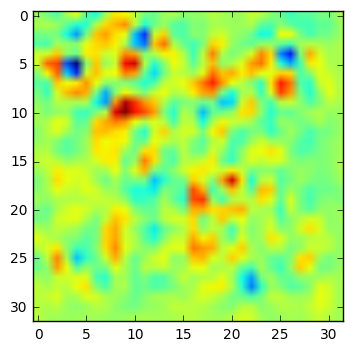

In [9]:
plt.imshow(numpy.reshape(stab_gradient[0], [32,32,3])[:,:,0])

We compute __symbolic__ gradient of loss w.r.t. input

In [10]:
stab_gradient = perturbations.compute_fs_grad_sym(stab_net, X_test[0:3], y_test[0:3])

Processing sample n°: 0
Processing sample n°: 1
Processing sample n°: 2


We plot symbolic gradient

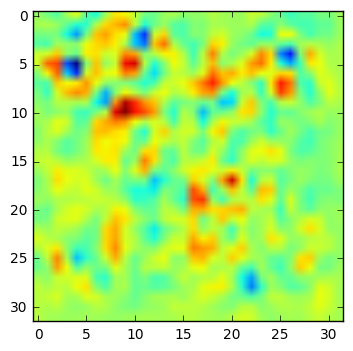

In [11]:
plt.imshow(numpy.reshape(stab_gradient[0], [32,32,3])[:,:,0])

It's a match!